<a href="https://colab.research.google.com/github/badrinarayanan02/Computer-Vision/blob/main/2348507_ImageEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Enhancement Techniques**

Implement various image enhancement techniques using Built-in and user defined functions

1. Image Negative
2. Gray Level Slicing
3. Histogram Equalization
4. Contrast Stretching
5. Bit plane Slicing

In [2]:
import cv2
import matplotlib.pyplot as mp
import numpy as np

Functionality to display the images using Matplotlib

In [24]:
def display_images(images, titles):
    fig, axes = mp.subplots(1, len(images), figsize=(35, 10))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    mp.show()

Functionality to perform Image Negative

In [14]:
def imageNegative(img):
    return 255 - img

Functionality to perform Contrast Stretching

In [5]:
def contrastStretching(img, min_out=0, max_out=255):
    min_in, max_in = np.min(img), np.max(img)
    stretched_img = ((img - min_in) / (max_in - min_in)) * (max_out - min_out) + min_out
    return stretched_img.astype(np.uint8)

Performing Gray Level Slicing

In [6]:
def grayLevelSlicing(img, lower_threshold, upper_threshold):
    mask = np.logical_and(img >= lower_threshold, img <= upper_threshold)
    sliced_img = np.where(mask, 255, 0).astype(np.uint8)
    return sliced_img

Performing Bit Plane Slicing

In [9]:
def bitPlaneSlicing(img, bit):
    return (img >> bit) & 1

Functionality to perform Histogram Equalization

In [10]:
def histogramEqualization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    equalized_img = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape)
    return equalized_img.astype(np.uint8)


array([[  2,   2,   2, ...,  19,  19,  19],
       [  2,   2,   2, ...,  19,  19,  19],
       [  2,   2,   2, ...,  17,  17,  17],
       ...,
       [ 20,  20,  13, ...,  86,  59,  81],
       [ 36,  40,  24, ...,  96,  76,  73],
       [ 43,  54,  33, ..., 101,  90,  82]], dtype=uint8)
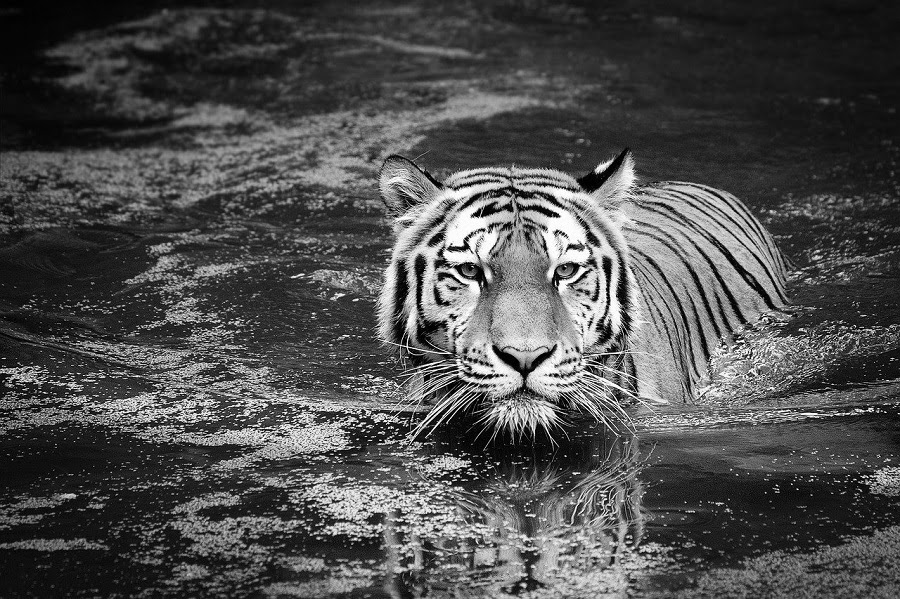

In [12]:
image_path = "/content/tiger-jpg.jpg"
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_img

In [15]:
negative_img = imageNegative(original_img)
stretched_img = contrastStretching(original_img)
sliced_img = grayLevelSlicing(original_img, 100, 200)
bit_plane_img = bitPlaneSlicing(original_img, 7)
equalized_img = histogramEqualization(original_img)

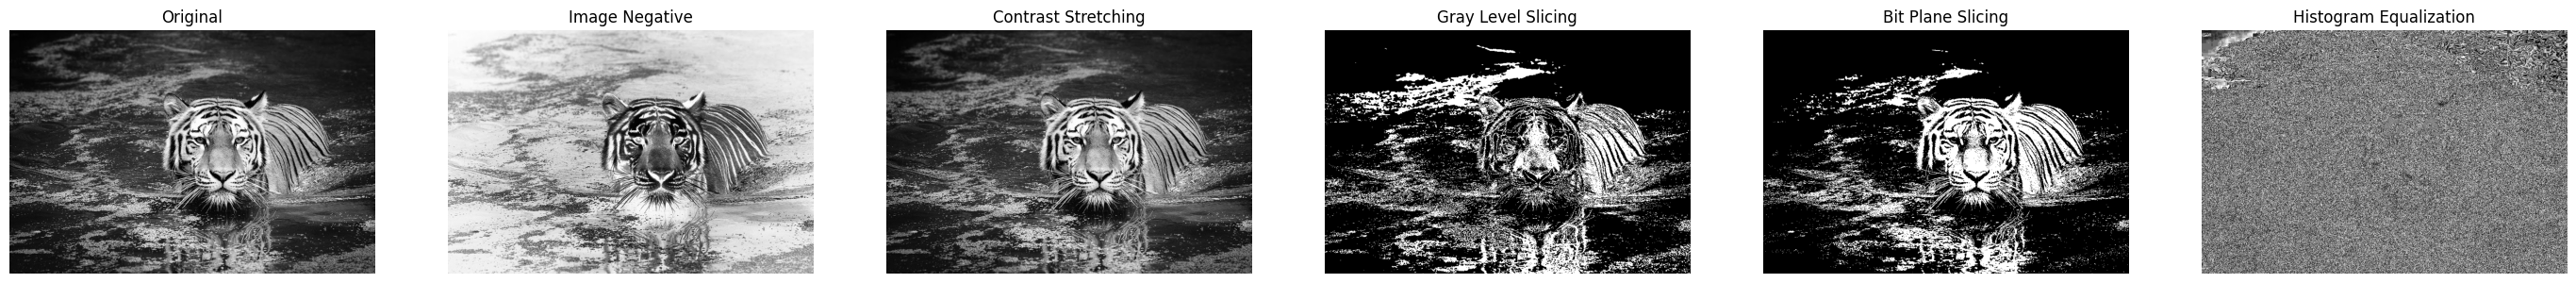

In [25]:
display_images(
    [original_img, negative_img, stretched_img, sliced_img, bit_plane_img, equalized_img],
    ["Original", "Image Negative", "Contrast Stretching", "Gray Level Slicing", "Bit Plane Slicing", "Histogram Equalization"]
)

**Understandings**

The image negative is a simple enhancement technique where the pixel values of the original image are inverted. Dark pixels become bright, and bright pixels become dark. This is achieved by subtracting each pixel value from the maximum intensity value (255 for an 8-bit image).

Contrast stretching aims to enhance the contrast of an image by spreading the range of pixel intensities.

Gray level slicing is a technique where a specific range of pixel intensities is highlighted, and the rest are set to a constant value (usually 0 or 255).

Bit plane slicing involves extracting a specific bit from each pixel in the image. This can be useful for analyzing the contribution of different bits to the overall image.

Histogram equalization is a technique used to enhance the contrast of an image by redistributing the pixel intensities.

**Output**

We can observe the changes in the image. But when performing histogram equalization, the image is not clear.

**Performing Histogram Equalization with Smoothing**

In [26]:
def histogram_equalization_with_smoothing(img, kernel_size=(5, 5), sigma=1.0):
    equalized_img = cv2.equalizeHist(img)
    smoothed_img = cv2.GaussianBlur(equalized_img, kernel_size, sigma)
    return smoothed_img

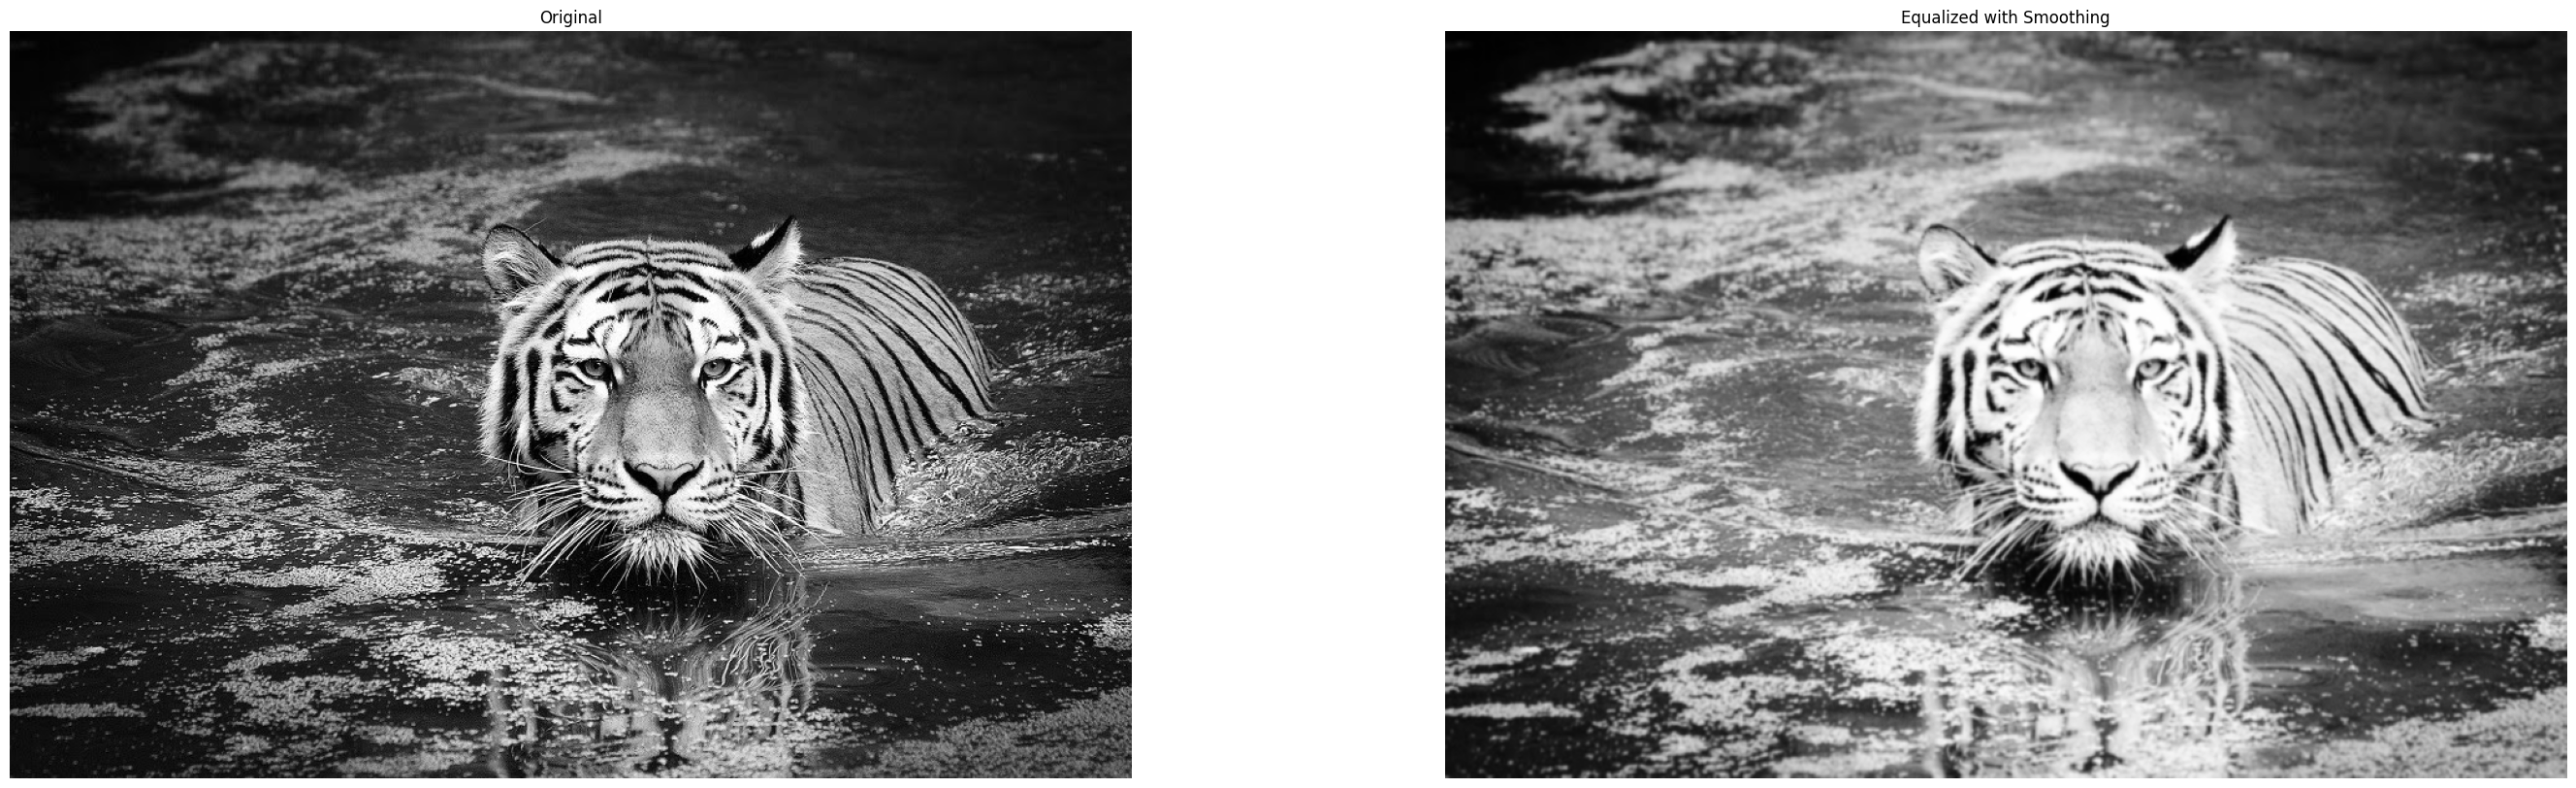

In [28]:
equalized_smoothed_img = histogram_equalization_with_smoothing(original_img)

display_images(
    [original_img, equalized_smoothed_img],
    ["Original", "Equalized with Smoothing"]
)

**Inference**

Now, we can able to see the clear vision after performing histogram equalization.

# **Conclusion**

Thus the different image enhancement techniques like image negative, gray level slicing, bit plane slicing, contrast stretching, histogram equalization are performed successfully.

Common usecases of this image enhancement techniques are medical imaging, satellite imaging etc.